In [1]:
# Interoperable file paths
import os
# Find the home folder
import pathlib
# Work with vector data
import geopandas as gpd
import pandas as pd
# Interactive plots of vector data
import hvplot.pandas
# Save maps and plots to files
import holoviews as hv
#Import raster file
import rioxarray as rxr
# Open netCDF
import xarray as xr
# Merge rasters
import rioxarray.merge as rxrmerge
# Get boundaries
from math import floor, ceil
# Access data from earthdata
import earthaccess
import xrspatial
#check if files already downloaded
from glob import glob
#plot overlapping maps
import matplotlib.pyplot as plt

# Convert shapefile to mask
#import regionmask 


c:\Users\alison\miniconda3\envs\earth-analytics-python\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
# Check working directory
pathlib.Path.home()

WindowsPath('C:/Users/alison')

In [3]:
# Define and create the project data directory (separate from GH repo folder)
data_dir = os.path.join(
    pathlib.Path.home(),
    'Documents',
    'earth-analytics-class',
    'data',
    'habitat'
)

os.makedirs(data_dir, exist_ok=True)

data_dir

'C:\\Users\\alison\\Documents\\earth-analytics-class\\data\\habitat'

## Grassland Boundary

In [4]:
# Download USFS National Grassland Units
grassland_url = ("https://data.fs.usda.gov/geodata/edw/edw_resources/shp/S_USA.NationalGrassland.zip")

grassland_dir = os.path.join(data_dir, 'grassland')

os.makedirs(grassland_dir, exist_ok=True)

grassland_path = os.path.join (grassland_dir, 'grassland.shp')

# Only download data once
if not os.path.exists(grassland_path):
    # Download sample raster data
    grassland_gdf = gpd.read_file(grassland_url)
    grassland_gdf.to_file(grassland_path)

# Read in shapefile file from computer
grassland_gdf = gpd.read_file(grassland_path)

# View grassland geodataframe
grassland_gdf

,NATIONALGR,GRASSLANDN,GIS_ACRES,SHAPE_AREA,SHAPE_LEN,geometry
0,281771010328,Fort Pierre National Grassland,209044.225,0.095149,1.455518,"POLYGON ((-100.08409 44.28162, -100.08409 44.2..."
1,295507010328,Butte Valley National Grassland,19489.170,0.008557,0.853736,"MULTIPOLYGON (((-121.996 41.84049, -121.996 41..."
2,295508010328,Kiowa National Grassland,144281.321,0.058543,9.858642,"MULTIPOLYGON (((-104.30414 36.08063, -104.3041..."
3,295509010328,Sheyenne National Grassland,70428.175,0.033356,4.097398,"MULTIPOLYGON (((-97.31081 46.51457, -97.30559 ..."
4,295510010328,Cedar River National Grassland,6717.517,0.003157,0.999947,"MULTIPOLYGON (((-101.82221 45.95896, -101.8170..."
5,295511010328,Black Kettle National Grassland,33103.349,0.013340,4.561060,"MULTIPOLYGON (((-99.91659 35.71892, -99.91661 ..."
6,295512010328,Rita Blanca National Grassland,94127.091,0.038271,6.652113,"MULTIPOLYGON (((-102.62993 36.44072, -102.6298..."
7,295513010328,Thunder Basin National Grassland,626249.208,0.282888,44.088050,"MULTIPOLYGON (((-105.46005 43.31908, -105.4601..."
8,295514010328,McClellan Creek National Grassland,1401.715,0.000562,0.115902,"POLYGON ((-100.86003 35.20951, -100.86008 35.2..."
9,295515010328,Caddo National Grassland,68479.549,0.026940,1.159342,"MULTIPOLYGON (((-95.85492 33.79814, -95.85494 ..."


In [5]:
# Plot the data (with basemap)
grassland_map = grassland_gdf.hvplot(
    # Givethe map a descriptive title
    title="USFS Grassland Units",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Add labels when hover over
    hover_cols=["GRASSLANDN"],
    # Change the colors & line thickness
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=1,
    # Change the image size
    frame_width=400, frame_height=400)

grassland_map

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (GRASSLANDN)

In [6]:
# Pull out both grasslands at once
subset_grasslands_gdf = (grassland_gdf.set_index('GRASSLANDN')
               .loc[['Pawnee National Grassland',
                     'Comanche National Grassland']])
subset_grasslands_gdf

,NATIONALGR,GIS_ACRES,SHAPE_AREA,SHAPE_LEN,geometry
GRASSLANDN,,,,,
Pawnee National Grassland,295523010328,208424.885,0.089972,15.341594,"MULTIPOLYGON (((-104.58106 40.82664, -104.5810..."
Comanche National Grassland,295522010328,444413.904,0.183064,26.658022,"MULTIPOLYGON (((-104.02263 37.69224, -104.0225..."


In [7]:
# Choose 1st grassland site
pawnee_gdf = (grassland_gdf[grassland_gdf['GRASSLANDN'] == 'Pawnee National Grassland'])
pawnee_gdf

,NATIONALGR,GRASSLANDN,GIS_ACRES,SHAPE_AREA,SHAPE_LEN,geometry
15,295523010328,Pawnee National Grassland,208424.885,0.089972,15.341594,"MULTIPOLYGON (((-104.58106 40.82664, -104.5810..."


In [8]:
#Plot 1st grassland site

pawnee_gdf.hvplot(
    # Givethe map a descriptive title
    title="Pawnee Grassland",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Add labels when hover over
    hover_cols=["GRASSLANDN"],
    # Change the colors & line thickness
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=1,
    # Change the image size
    frame_width=400, frame_height=400)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (GRASSLANDN)

In [9]:
# Choose 2nd grassland site
comanche_gdf = (grassland_gdf[grassland_gdf['GRASSLANDN'] == 'Comanche National Grassland'])
comanche_gdf

,NATIONALGR,GRASSLANDN,GIS_ACRES,SHAPE_AREA,SHAPE_LEN,geometry
14,295522010328,Comanche National Grassland,444413.904,0.183064,26.658022,"MULTIPOLYGON (((-104.02263 37.69224, -104.0225..."


In [10]:
#Plot 2nd grassland site

comanche_gdf.hvplot(
    # Givethe map a descriptive title
    title="Comanche Grassland",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Add labels when hover over
    hover_cols=["GRASSLANDN"],
    # Change the colors & line thickness
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=1,
    # Change the image size
    frame_width=400, frame_height=400)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (GRASSLANDN)

## POLARIS Soil Data

<Axes: >

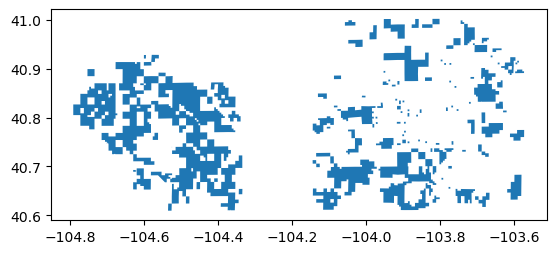

In [11]:
# Find boundary extent of grassland
pawnee_gdf.plot()

In [12]:
pawnee_gdf.total_bounds

array([-104.7914421 ,   40.60956304, -103.57328565,   41.00184675])

In [13]:
bounds_min_lon, bounds_min_lat, bounds_max_lon, bounds_max_lat = (pawnee_gdf.total_bounds)

for value in range(floor(bounds_min_lon), ceil(bounds_max_lon)):
    print(value)

-105
-104


In [14]:
# Download POLARIS soil data (example with 1 tile)

soil_url_template = ("http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0"
            "/ph"
            "/mean"
            "/0_5"
            "/lat{min_lat}{max_lat}_lon{min_lon}{max_lon}.tif")

soil_url = soil_url_template.format(min_lat=40, max_lat=41, min_lon =-105, max_lon =-104)

soil_url

'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat4041_lon-105-104.tif'

In [15]:
# Loop through to download multiple tiles at once

soil_url_list = []
for value in range(floor(bounds_min_lon), ceil(bounds_max_lon)):
    soil_url = soil_url_template.format(
        min_lat=40, max_lat=41, 
        min_lon=value, max_lon=value+1)
    soil_url_list.append(soil_url)
    
soil_url_list

['http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat4041_lon-105-104.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat4041_lon-104-103.tif']

In [16]:
#Open raster file
soil_da = rxr.open_rasterio(
    soil_url,
    mask_and_scale=True
    ).squeeze()

soil_da

<xarray.DataArray (y: 3600, x: 3600)> Size: 52MB
[12960000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 29kB -104.0 -104.0 -104.0 ... -103.0 -103.0 -103.0
  * y            (y) float64 29kB 41.0 41.0 41.0 41.0 ... 40.0 40.0 40.0 40.0
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area

In [17]:
# Plot soil raster
#soil_da.plot()

In [18]:
# Create loop for soils data

# Get bounds for each row in geodataframe
bounds_df = subset_grasslands_gdf.bounds
bounds_df

,minx,miny,maxx,maxy
GRASSLANDN,,,,
Pawnee National Grassland,-104.791442,40.609563,-103.573286,41.001847
Comanche National Grassland,-104.059313,36.994609,-102.313615,37.913807


In [19]:
# Check column names
bounds_df.columns

Index(['minx', 'miny', 'maxx', 'maxy'], dtype='object')

In [20]:
# Check data type
type(bounds_df)

pandas.core.frame.DataFrame

In [21]:
# Check index
bounds_df.index

Index(['Pawnee National Grassland', 'Comanche National Grassland'], dtype='object', name='GRASSLANDN')

In [22]:
# Define POLARIS URL template

soil_url_template = ("http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0"
            "/ph"
            "/mean"
            "/0_5"
            "/lat{min_lat}{max_lat}_lon{min_lon}{max_lon}.tif")

soil_url_template



'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat{min_lat}{max_lat}_lon{min_lon}{max_lon}.tif'

In [23]:
# Testing 
for row in bounds_df.values:
    print(f"{row[0]}")

for row in bounds_df.values:
    x = ceil(row[0])
    print(x)

-104.79144209999998
-104.05931300999998
-104
-104


In [24]:
# Loop through multiple sites

#Make empty dataframe
soil_urls = []

#Loop through all lat-lon combos and create URLs
for site_name, row in bounds_df.groupby(level=0):
    for lon_value in range(floor(row.minx), ceil(row.maxx)):
        for lat_value in range(floor(row.miny), ceil(row.maxy)):
            soil_url = soil_url_template.format(
                min_lat=lat_value, max_lat=lat_value+1,
                min_lon=lon_value, max_lon=lon_value+1)
            soil_urls.append(soil_url)
display(soil_urls)

C:\Users\alison\AppData\Local\Temp\ipykernel_32472\2566705882.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  for lon_value in range(floor(row.minx), ceil(row.maxx)):
C:\Users\alison\AppData\Local\Temp\ipykernel_32472\2566705882.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  for lat_value in range(floor(row.miny), ceil(row.maxy)):


['http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat3637_lon-105-104.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat3738_lon-105-104.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat3637_lon-104-103.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat3738_lon-104-103.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat3637_lon-103-102.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat3738_lon-103-102.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat4041_lon-105-104.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat4142_lon-105-104.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat4041_lon-104-103.tif',
 'http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/ph/mean/0_5/lat4142_lon-104-103.tif']

In [25]:
# Create empty list
soil_das = []

# Loop through each of the soil files
for url in soil_urls:
    # Open the raster file with masking and scaling, and squeeze it to remove single-dimensional axes
    soil_da = rxr.open_rasterio(url, mask_and_scale=True).squeeze()
    
    # Append the opened DataArray to the list
    soil_das.append(soil_da)

soil_das

[<xarray.DataArray (y: 3600, x: 3600)> Size: 52MB
 [12960000 values with dtype=float32]
 Coordinates:
     band         int64 8B 1
   * x            (x) float64 29kB -105.0 -105.0 -105.0 ... -104.0 -104.0 -104.0
   * y            (y) float64 29kB 37.0 37.0 37.0 37.0 ... 36.0 36.0 36.0 36.0
     spatial_ref  int64 8B 0
 Attributes:
     AREA_OR_POINT:  Area,
 <xarray.DataArray (y: 3600, x: 3600)> Size: 52MB
 [12960000 values with dtype=float32]
 Coordinates:
     band         int64 8B 1
   * x            (x) float64 29kB -105.0 -105.0 -105.0 ... -104.0 -104.0 -104.0
   * y            (y) float64 29kB 38.0 38.0 38.0 38.0 ... 37.0 37.0 37.0 37.0
     spatial_ref  int64 8B 0
 Attributes:
     AREA_OR_POINT:  Area,
 <xarray.DataArray (y: 3600, x: 3600)> Size: 52MB
 [12960000 values with dtype=float32]
 Coordinates:
     band         int64 8B 1
   * x            (x) float64 29kB -104.0 -104.0 -104.0 ... -103.0 -103.0 -103.0
   * y            (y) float64 29kB 37.0 37.0 37.0 37.0 ... 36.0 36.0

In [26]:
# Divide by grassland site
comanche_soil_das = soil_das[:6]
pawnee_soil_das = soil_das[-4:]

In [27]:
# Merge all rasters for each grassland
comanche_merged_soil_das = rxrmerge.merge_arrays(comanche_soil_das)
pawnee_merged_soil_das = rxrmerge.merge_arrays(pawnee_soil_das)

In [28]:
# Plot
#comanche_merged_soil_das.plot()

In [29]:
# Plot
#pawnee_merged_soil_das.plot()

In [30]:
# Check CRS of soil data
pawnee_merged_soil_das.rio.crs

CRS.from_epsg(4326)

In [31]:
#Convert shapefiles to CRS of soil raster data

pawnee_gdf = pawnee_gdf.to_crs(pawnee_merged_soil_das.rio.crs)
comanche_gdf = comanche_gdf.to_crs(comanche_merged_soil_das.rio.crs)

comanche_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
# Crop to grassland boundaries! (figure out loop)
# save to computer


## MACAv2 Climate Data

In [33]:
# Access MACAv2 data

# Define start and end year
start_year = 2091
end_year = start_year + 4

# save url with year as customizable
maca_url_template = ('http://thredds.northwestknowledge.net:8080/thredds'
                     '/dodsC/MACAV2/CCSM4/macav2metdata_pr_CCSM4_r6i1p1'
                     '_rcp85_{start_year_val}_{end_year_val}_CONUS_monthly.nc')


# Insert start and end year
maca_url = maca_url_template.format(start_year_val = start_year, end_year_val = end_year)

maca_url

'http://thredds.northwestknowledge.net:8080/thredds/dodsC/MACAV2/CCSM4/macav2metdata_pr_CCSM4_r6i1p1_rcp85_2091_2095_CONUS_monthly.nc'

In [34]:
# Open netCDF
maca_da = xr.open_dataset(maca_url).squeeze().precipitation
maca_da

<xarray.DataArray 'precipitation' (time: 60, lat: 585, lon: 1386)> Size: 195MB
[48648600 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 5kB 25.06 25.1 25.15 25.19 ... 49.27 49.31 49.35 49.4
    crs      int32 4B 1
  * lon      (lon) float64 11kB 235.2 235.3 235.3 235.4 ... 292.9 292.9 292.9
  * time     (time) object 480B 2091-01-15 00:00:00 ... 2095-12-15 00:00:00
Attributes:
    long_name:      Monthly Precipitation Amount
    units:          mm
    grid_mapping:   crs
    standard_name:  precipitation
    cell_methods:   time: sum(interval: 24 hours): sum over days
    comments:       Total monthly precipitation at surface: includes both liq...
    _ChunkSizes:    [ 10  44 107]

In [35]:
# Convert longitude to -180 to 180 (from 0 to 360)

#Create conversion function
def convert_longitude(lon):
    """Convert longitude frmo 0-360 to -180-180"""
    return(lon - 360) if lon > 180 else lon

# Apply function to dataset
maca_da = maca_da.assign_coords(
    lon=("lon",[convert_longitude(l) for l in maca_da.lon.values])
)

# Designate names of x and y dimentions
maca_da = maca_da.rio.set_spatial_dims(x_dim='lon', y_dim = 'lat')

maca_da


<xarray.DataArray 'precipitation' (time: 60, lat: 585, lon: 1386)> Size: 195MB
[48648600 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 5kB 25.06 25.1 25.15 25.19 ... 49.27 49.31 49.35 49.4
    crs      int32 4B 1
  * time     (time) object 480B 2091-01-15 00:00:00 ... 2095-12-15 00:00:00
  * lon      (lon) float64 11kB -124.8 -124.7 -124.7 ... -67.15 -67.11 -67.06
Attributes:
    long_name:      Monthly Precipitation Amount
    units:          mm
    grid_mapping:   crs
    standard_name:  precipitation
    cell_methods:   time: sum(interval: 24 hours): sum over days
    comments:       Total monthly precipitation at surface: includes both liq...
    _ChunkSizes:    [ 10  44 107]

In [36]:
# Check CRS of dataset
maca_da.rio.crs

CRS.from_wkt('GEOGCS["undefined",DATUM["undefined",SPHEROID["undefined",6378137,298.257223563]],PRIMEM["undefined",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]')

In [37]:
# Find bounds of grassland site
bounds = pawnee_gdf.to_crs(maca_da.rio.crs).total_bounds
bounds

array([-104.79144253,   40.6095664 , -103.57328581,   41.00184746])

In [38]:
# Clip to grassland boundary
# * makes bounds read as 4 individual numbers instead of 1 set
maca_da_clip = maca_da.rio.clip_box(*bounds)

maca_da_clip

#How plot map?


<xarray.DataArray 'precipitation' (time: 60, lat: 11, lon: 30)> Size: 79kB
[19800 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 88B 40.6 40.65 40.69 40.73 ... 40.9 40.94 40.98 41.02
  * time     (time) object 480B 2091-01-15 00:00:00 ... 2095-12-15 00:00:00
  * lon      (lon) float64 240B -104.8 -104.7 -104.7 ... -103.6 -103.6 -103.6
    crs      int64 8B 0
Attributes:
    long_name:      Monthly Precipitation Amount
    units:          mm
    standard_name:  precipitation
    cell_methods:   time: sum(interval: 24 hours): sum over days
    comments:       Total monthly precipitation at surface: includes both liq...
    _ChunkSizes:    [ 10  44 107]

In [ ]:
# Set up loop to do entire process

#Create conversion function (outside loop)
def convert_longitude(lon):
    """Convert longitude from 0-360 to -180-180"""
    return(lon - 360) if lon > 180 else lon

#Make empty list
maca_da_list = []

# Create loop
for site_name, site_gdf in {'pawnee':pawnee_gdf, 'comanche':comanche_gdf}.items():
    for variable in ['pr']:
        for start_year in [2091, 2006]:
            end_year = start_year + 4
            maca_url = ('http://thredds.northwestknowledge.net:8080/thredds'
                     f'/dodsC/MACAV2/CCSM4/macav2metdata_{variable}_CCSM4_r6i1p1'
                     f'_rcp85_{start_year}_{end_year}_CONUS_monthly.nc')

            maca_da = xr.open_dataset(maca_url).squeeze().precipitation

            bounds = site_gdf.to_crs(maca_da.rio.crs).total_bounds

            maca_da = maca_da.assign_coords(
                lon=("lon",[convert_longitude(l) for l in maca_da.lon.values]))

            maca_da = maca_da.rio.set_spatial_dims(x_dim='lon', y_dim = 'lat')

            maca_da = maca_da.rio.clip_box(*bounds)

            maca_da_list.append(dict(
                site_name = site_name,
                variable = variable,
                start_year = start_year,
                da = maca_da))

maca_df = pd.DataFrame(maca_da_list)
maca_df

,site_name,variable,start_year,da
0,pawnee,pr,2091,[[[<xarray.DataArray 'precipitation' ()> Size:...
1,pawnee,pr,2006,[[[<xarray.DataArray 'precipitation' ()> Size:...
2,comanche,pr,2091,[[[<xarray.DataArray 'precipitation' ()> Size:...
3,comanche,pr,2006,[[[<xarray.DataArray 'precipitation' ()> Size:...


In [40]:
# %store eco_gdf gbif_gdf
# %store -r

## Elevation Data

In [41]:
#Make folder to store elevation data within data_dir
elevation_dir = os.path.join(data_dir, 'srtm')
os.makedirs(elevation_dir, exist_ok= True)
elevation_dir

'C:\\Users\\alison\\Documents\\earth-analytics-class\\data\\habitat\\srtm'

In [42]:
# Log into earthaccess
earthaccess.login()

In [43]:
# Search available datasets
datasets = earthaccess.search_datasets(keyword = 'SRTM DEM')

# Look at metadata for available datsets
for dataset in datasets:
    print(dataset['umm']['ShortName'], dataset['umm']['EntryTitle'])

NASADEM_SHHP NASADEM SRTM-only Height and Height Precision Mosaic Global 1 arc second V001
NASADEM_SIM NASADEM SRTM Image Mosaic Global 1 arc second V001
NASADEM_SSP NASADEM SRTM Subswath Global 1 arc second V001
C_Pools_Fluxes_CONUS_1837 CMS: Terrestrial Carbon Stocks, Emissions, and Fluxes for Conterminous US, 2001-2016
SRTMGL1 NASA Shuttle Radar Topography Mission Global 1 arc second V003
GEDI01_B GEDI L1B Geolocated Waveform Data Global Footprint Level V002
NASADEM_HGT NASADEM Merged DEM Global 1 arc second V001
SRTMGL3 NASA Shuttle Radar Topography Mission Global 3 arc second V003
GEDI02_B GEDI L2B Canopy Cover and Vertical Profile Metrics Data Global Footprint Level V002
SRTMGL1_NC NASA Shuttle Radar Topography Mission Global 1 arc second NetCDF V003
SRTMGL30 NASA Shuttle Radar Topography Mission Global 30 arc second V002
GFSAD30EUCEARUMECE Global Food Security-support Analysis Data (GFSAD) Cropland Extent 2015 Europe, Central Asia, Russia, Middle East product 30 m V001
GFSAD30SA

In [44]:
# Define spatial bounds- must be tuple to work with earthaccess
pawnee_bounds_elev = tuple(pawnee_gdf.total_bounds)
# Define buffer around bounds
buffer = 0.025
xmin, ymin, xmax, ymax = pawnee_bounds_elev
pawnee_bounds_elev_buffer = (xmin-buffer, ymin-buffer, xmax+buffer, ymax+buffer)
pawnee_bounds_elev_buffer

(np.float64(-104.81644253125484),
 np.float64(40.58456640474456),
 np.float64(-103.54828580588752),
 np.float64(41.026847461543504))

In [45]:
# add "if " statement to only dowbload if not already downloaded
srtm_pattern = os.path.join(elevation_dir, "*.ght.zip")
if not glob(srtm_pattern):

    # Download strm data
    srtm_results = earthaccess.search_data(
        short_name = 'SRTMGL1',
        bounding_box=pawnee_bounds_elev_buffer)

    # Download all tiles
    srtm_results_files = earthaccess.download(srtm_results, elevation_dir)

QUEUEING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
srtm_results_files

['C:\\Users\\alison\\Documents\\earth-analytics-class\\data\\habitat\\srtm\\N41W104.SRTMGL1.hgt.zip',
 'C:\\Users\\alison\\Documents\\earth-analytics-class\\data\\habitat\\srtm\\N40W104.SRTMGL1.hgt.zip',
 'C:\\Users\\alison\\Documents\\earth-analytics-class\\data\\habitat\\srtm\\N41W105.SRTMGL1.hgt.zip',
 'C:\\Users\\alison\\Documents\\earth-analytics-class\\data\\habitat\\srtm\\N40W105.SRTMGL1.hgt.zip']

<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

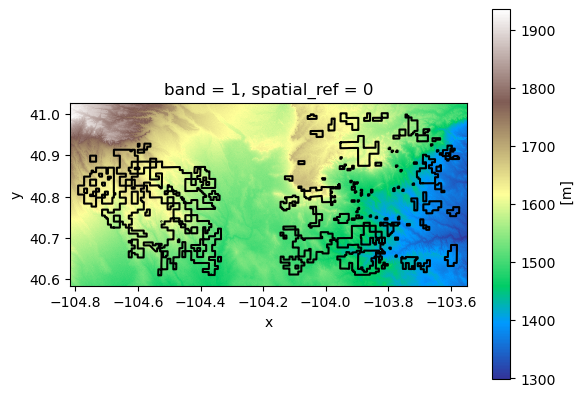

In [47]:
# Create loop to open all the files
srtm_da_list = []

for srtm_path in srtm_results_files:
    srtm_tile_da = rxr.open_rasterio(srtm_path, mask_and_scale=True).squeeze()
    cropped_srtm_da = srtm_tile_da.rio.clip_box(*pawnee_bounds_elev_buffer)
    srtm_da_list.append(cropped_srtm_da)
    
srtm_da = rxrmerge.merge_arrays(srtm_da_list)
srtm_da.plot(cmap='terrain')

# To stack plots use 'gca' (get current axes)
# Use "boundary" to show line instead of filled shapes
pawnee_gdf.boundary.plot(ax=plt.gca(), color='black')

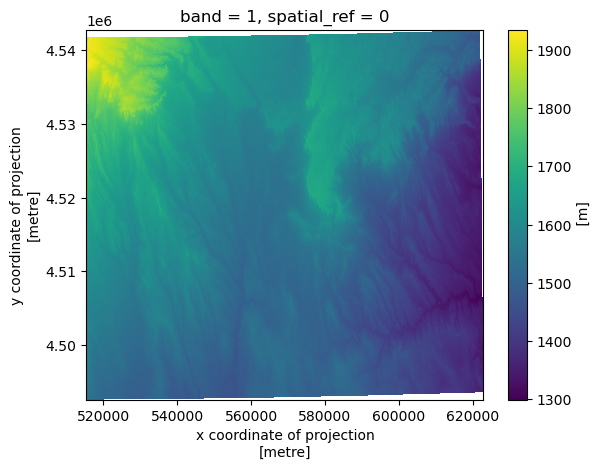

In [48]:
#lat/lon and height need to be in same units (m) - reproject to UTM
utm13_epsg = 32613
srtm_proj_da = srtm_da.rio.reproject(utm13_epsg)
srtm_proj_da.plot()


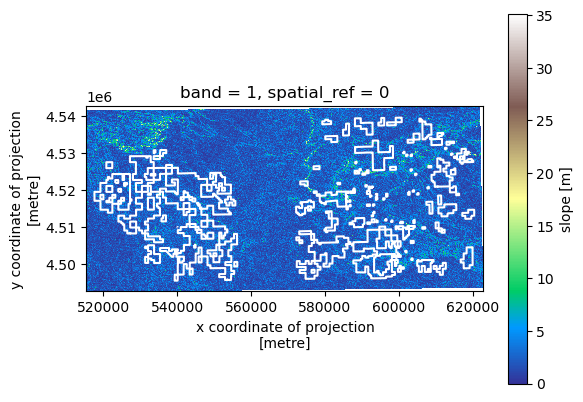

In [49]:
#Calculate slope
slope_da = xrspatial.slope(srtm_proj_da)
slope_da.plot(cmap = "terrain")

#Add grassland boundary
pawnee_gdf.to_crs(utm13_epsg).boundary.plot(ax=plt.gca(), color='white')

#Get rid of extra text with map
plt.show()

In [ ]:
# clip to grassland boundary

srtm_da = 

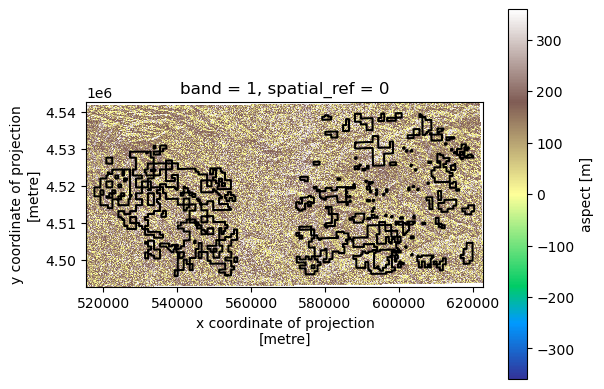

In [50]:
#Calculate aspect
aspect_da = xrspatial.aspect(srtm_proj_da)
aspect_da.plot(cmap = "terrain")

#Add grassland boundary
pawnee_gdf.to_crs(utm13_epsg).boundary.plot(ax=plt.gca(), color='black')

#Get rid of extra text with map
plt.show()

## Habitat Suitability Model

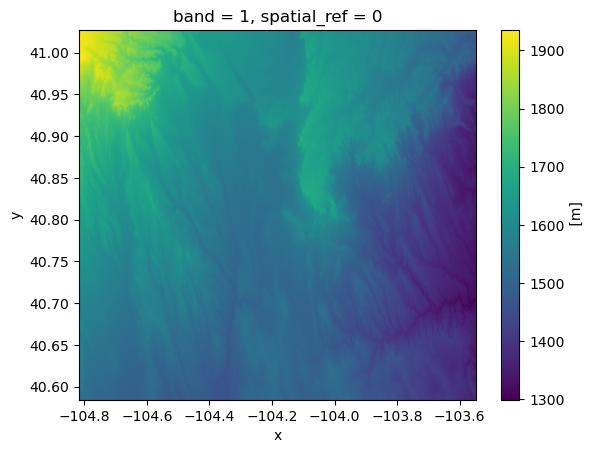

In [51]:
# Elevation data
srtm_da.plot()

In [52]:
# Climate data
# print out data with without data arrays (to reduce time to print)
maca_df.drop('da', axis='columns')

,site_name,variable,start_year
0,pawnee,pr,2091
1,pawnee,pr,2006
2,comanche,pr,2091
3,comanche,pr,2006


In [76]:
# Pull out 1 row from MACA data & extract data array from that row
# .values since da needs to be extracted from within another layer
# [0] after vaules or .item() to index out first element (remove parentheses around entire da)

# Add crs
# Group time by year, take annual sum, then min (of what?)

maca_pawnee_2091_da = (maca_df
                       [(maca_df.start_year==2091) & (maca_df.site_name=='pawnee')]
                       .da.values.item()
                       .rio.write_crs(4326)
                       .rio.set_spatial_dims('lat','lon')
                       .groupby('time.year')
                       .sum()
                       .min('year')
                       )
maca_pawnee_2091_da

<xarray.DataArray 'precipitation' (lat: 11, lon: 30)> Size: 1kB
array([[275.2954 , 278.84418, 283.44232, 278.91675, 273.62442, 263.0117 ,
        261.01868, 268.0348 , 265.6675 , 259.02615, 264.06494, 270.65396,
        276.99567, 287.8485 , 295.7628 , 300.6815 , 305.4956 , 309.9547 ,
        314.59076, 312.3337 , 301.94382, 298.72995, 298.94852, 293.9418 ,
        297.23758, 299.20752, 305.09073, 304.89893, 312.80472, 315.00607],
       [270.49048, 274.01263, 281.69278, 279.8534 , 272.80405, 262.47375,
        265.2861 , 265.2606 , 265.0537 , 257.8599 , 262.29214, 265.75906,
        274.29675, 287.95782, 295.59625, 300.49127, 303.93906, 304.00598,
        309.18552, 307.1295 , 302.5723 , 298.4558 , 296.48535, 292.73224,
        296.05862, 303.9913 , 302.24774, 299.37576, 314.86957, 317.74078],
       [267.92245, 275.84824, 283.07812, 277.26886, 272.10358, 267.1481 ,
        270.13095, 271.50757, 266.93588, 261.91885, 265.2868 , 265.44   ,
        277.90588, 283.9707 , 288.2182 , 294.69696, 293.40448, 297.4895 ,
        300.58707, 304.00583, 300.07886, 299.51306, 294.89304, 295.48706,
        300.5738 , 303.16547, 300.5489 , 304.46616, 310.47586, 315.12656],
       [271.18277, 277.32703, 282.2031 , 280.22034, 280.96637, 273.5826 ,
        271.87338, 274.65637, 273.70618, 275.612  , 273.0308 , 273.5524 ,
        274.28918, 284.9397 , 295.1583 , 289.54663, 294.65628, 297.36523,
        298.78986, 296.54303, 291.94904, 294.60678, 296.85687, 302.20416,
        304.89893, 306.99405, 303.40906, 310.32037, 316.17545, 318.6244 ],
...
        283.02362, 283.9432 , 284.55707, 283.35263, 276.04184, 273.26587,
        278.9123 , 292.63385, 300.8015 , 304.22452, 321.99335, 332.63177,
        326.31265, 328.20166, 320.54288, 335.21378, 339.6962 , 335.38684,
        320.49173, 312.96173, 315.45142, 314.8695 , 316.3603 , 324.56195],
       [309.8943 , 314.19772, 312.36884, 307.64795, 298.68332, 295.5068 ,
        289.0764 , 284.50177, 284.7895 , 287.97345, 279.03537, 279.02905,
        284.46777, 292.17807, 296.9587 , 302.08627, 314.75034, 330.14545,
        329.4851 , 330.31207, 335.6724 , 346.86316, 346.2423 , 351.42578,
        340.87674, 335.89795, 328.06424, 328.07156, 321.32056, 322.44363],
       [318.1958 , 316.49524, 314.1571 , 307.99576, 306.37994, 298.1038 ,
        295.66608, 290.9654 , 287.02725, 282.47565, 277.7745 , 276.7032 ,
        280.37122, 287.08044, 290.547  , 298.78644, 305.53152, 317.12015,
        323.72333, 325.21167, 333.26297, 342.68018, 341.11984, 345.9644 ,
        339.26352, 338.68457, 329.577  , 331.82382, 329.22995, 327.8378 ],
       [316.74765, 310.7753 , 312.7321 , 313.22665, 308.07373, 299.39844,
        301.19934, 290.3872 , 280.51175, 275.0271 , 274.46707, 277.58167,
        281.64203, 283.23816, 287.1037 , 294.491  , 306.71783, 309.3561 ,
        324.61615, 329.9298 , 331.47946, 332.62488, 333.08228, 336.0153 ,
        332.92975, 335.71664, 335.36176, 335.64215, 332.608  , 330.05963]],
      dtype=float32)
Coordinates:
  * lat          (lat) float64 88B 40.6 40.65 40.69 40.73 ... 40.94 40.98 41.02
  * lon          (lon) float64 240B -104.8 -104.7 -104.7 ... -103.6 -103.6
    crs          int64 8B 0
    spatial_ref  int64 8B 0

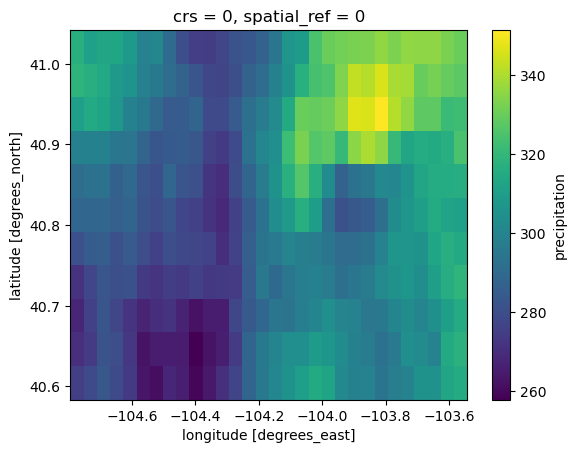

In [77]:
maca_pawnee_2091_da.plot()

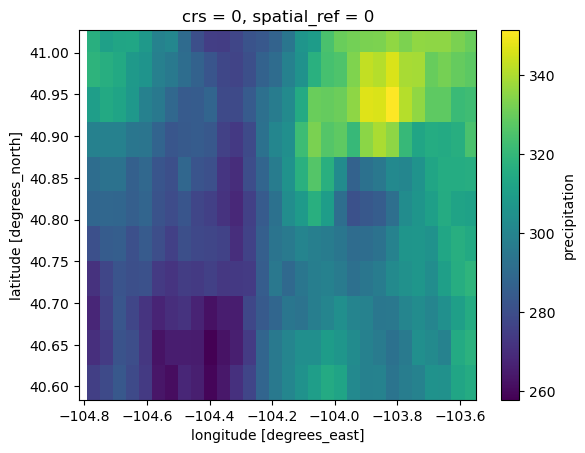

In [79]:
# Match to highest resolution possible
maca_pawnee_2091_da_reproj = maca_pawnee_2091_da.rio.reproject_match(srtm_da)
maca_pawnee_2091_da_reproj.plot()

In [80]:
# Compare original vs new da dimensions
maca_pawnee_2091_da.shape, maca_pawnee_2091_da_reproj.shape

((11, 30), (1594, 4566))

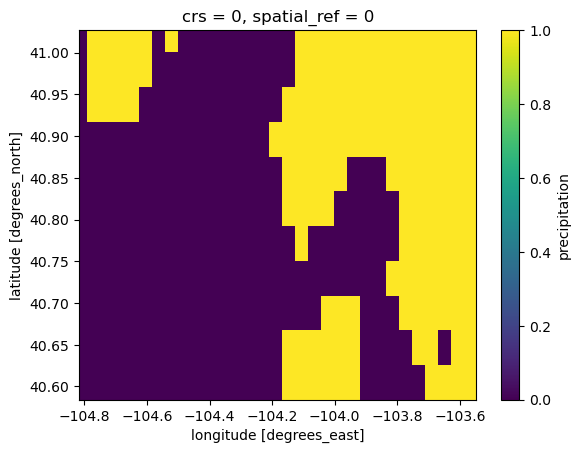

In [82]:
# Set precip threshold and apply to da
climate_suitable_2091 =maca_pawnee_2091_da_reproj > 300
climate_suitable_2091.plot()

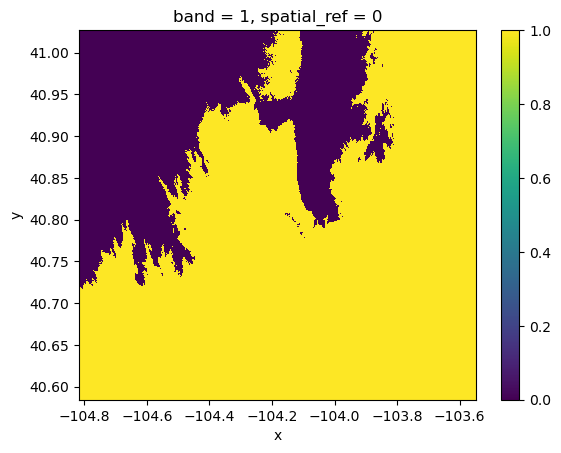

In [86]:
srtm_suitable = srtm_da < 1600
srtm_suitable.plot()

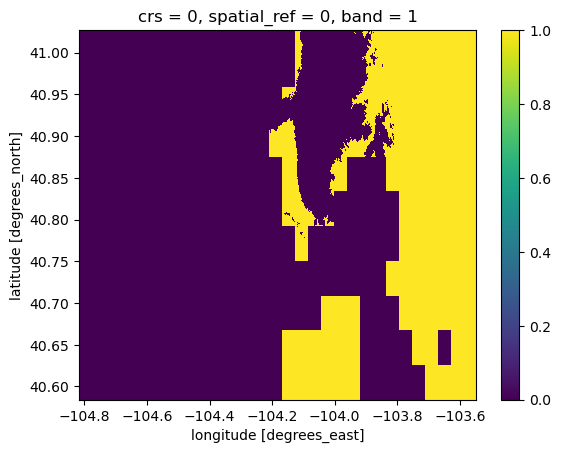

In [87]:
# Multiple rasters to find areas of combined suitability

suitable = climate_suitable_2091 * srtm_suitable
suitable.plot()